<h1>Preface</h1>

Research on US Mass Shootings

<img src="http://www.advocate-online.net/wp-content/uploads/2013/01/gun-control-graphic2backup.jpg" style="width:800px;height:300px;">

It is very unfortunate to hear of these incidents, and it seems like these events happen more frequently as of late. I wanted to perform a little bit of research on this topic, particularly locations and basic analysis. 

I found a Mother Jones' open dataset for download here: <a href="http://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data" target="_blank">US Mass Shootings, 1982-2015: Data From Mother Jones' Investigation</a> as a starting point. In addition, I discovered another dataset <a href="http://shootingtracker.com/wiki/Mass_Shootings_in_2015" target="_blank">Mass Shootings in 2015 Data</a> which I utilized for geolocation plotting towards the end of this notebook.

Using these datasets, we'll create some visualizations, frequency distributions, time series, heatmap, geolocation. We'll also experiement with IPython widgets for some interactivity.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"data/Mother Jones' Investigation- US Mass Shootings, 1982-2015 - US mass shootings.csv")

In [3]:
df.head()

,Case,Location,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of possible mental illness,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Umpqua Community College shooting,"Roseburg, OR",10/1/2015,2015,26-year-old Chris Harper Mercer opened fire a...,9,9,18,School,Unclear,...,From the home he shared with his mother. All w...,"Five pistols, one rifle, five magazines of amm...","9 mm Glock pistol, .40 caliber Smith & Wesson,...",Mixed,Male,http://www.nytimes.com/2015/10/03/us/chris-har...,http://www.latimes.com/nation/nationnow/la-na-...,NaN,NaN,Mass
1,Chattanooga military recruitment center,"Chattanooga, TN",7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Unclear,...,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun\n,"AK-47, AR-15, and 30-round magazines; 9mm handgun",Other,Male,http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311819,Mass
2,Charleston Church Shooting,"Charleston, SC",6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,unknown,...,"Shooter's Choice gun store in West Columbia, S...",Handgun,".45-caliber Glock (model 41, with 13-round cap...",White,Male,http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933143,Mass
3,Marysville-Pilchuck High Schoolshooting,"Marysville, WA",10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,Unclear,...,Gun was his father's.,Handgun,Beretta .40-caliber handgun,Native American,Male,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050824,-122.176918,Mass
4,Alturas tribal shooting,"Alturas, CA",2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,Unknown,...,NaN,Two handguns and a butcher knife,9mm semi-automatic handgun,Native American,Female,http://www.sacbee.com/news/local/crime/article...,NaN,41.487104,-120.542237,Mass


<h3>Basic count analysis</h3>

In [121]:
def plot_counts( df, col, maxrows=None, maxchars=500, figsize=(8,8), color='purple', ax=None ):
    ser = df[col].value_counts()
    
    if maxrows is None:
        maxrows = len(ser)

    ser = ser[:maxrows]
    ser.sort_values(inplace=True, ascending=True)

    if maxchars > 0 and ser.dtype=='O':
        ser.index = [ str(x)[:maxchars] + '...' if len(x) > maxchars else x for x in ser.index ]
    
    ser.plot(kind='barh', figsize=figsize, color=color, title=col, ax=ax)

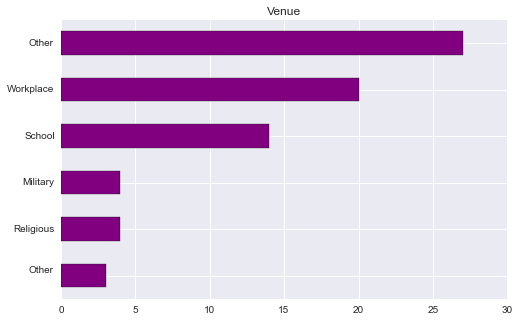

In [122]:
plot_counts( df, 'Venue', figsize=(8,5))

### multiple views in subplots

(The display with subplots and axes does not render properly if plotted via a function, so I'm changing the approach slightly to ensure the subplots abide by the correct sizes to be more aesthically pleasing)

In [85]:
def get_ser( df, col, maxrows=None, maxchars=500 ):
    ser = df[col].value_counts()
    
    if maxrows is None:
        maxrows = len(ser)

    ser = ser[:maxrows]
    ser.sort_values(inplace=True, ascending=True)

    if maxchars > 0:
        ser.index = [ str(x)[:maxchars] + '...' if len(x) > maxchars else x for x in ser.index ]
    
    return ser

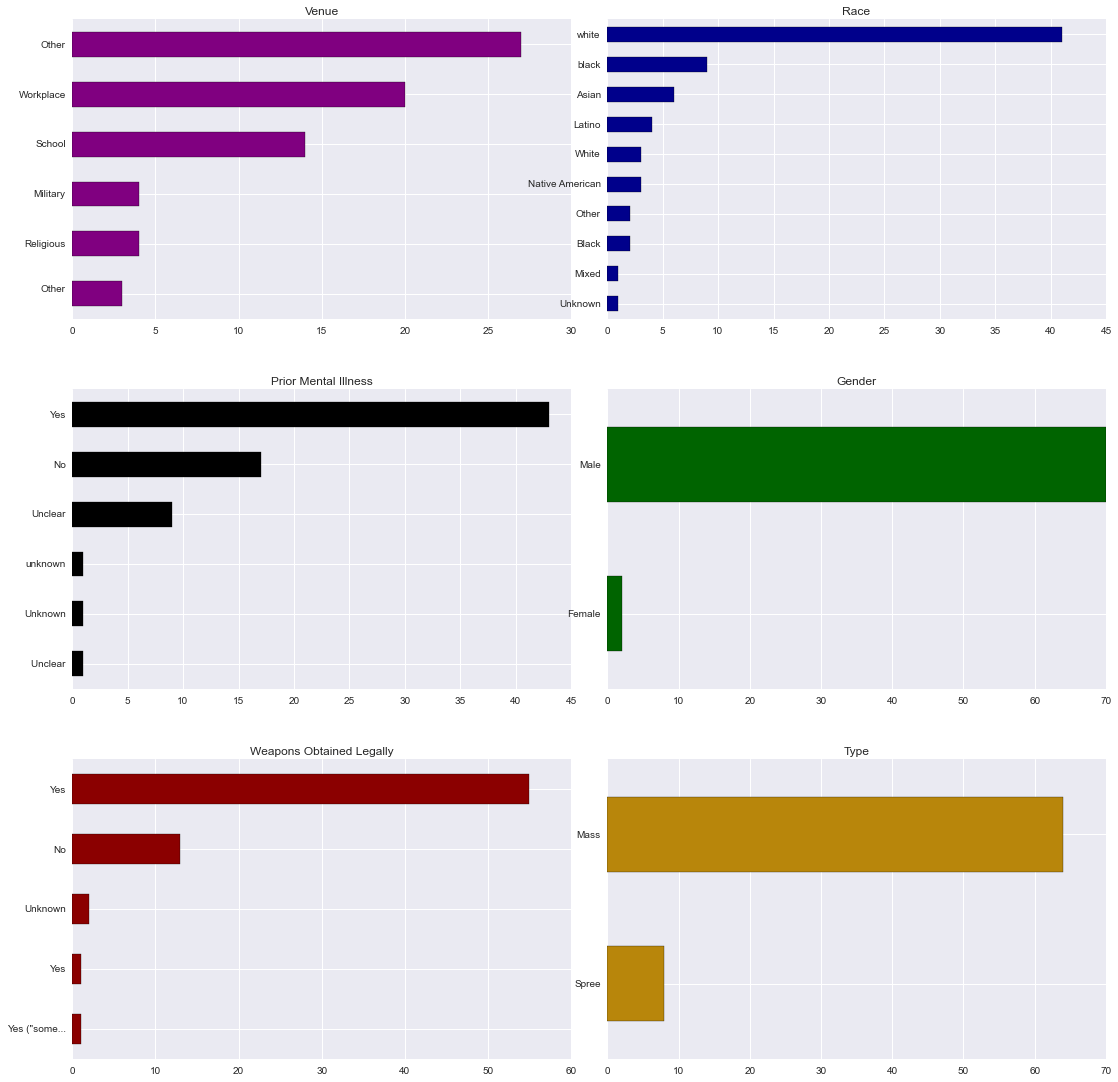

In [99]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
plt.tight_layout(pad=1, w_pad=1, h_pad=5)

get_ser(df, 'Venue').plot(kind='barh', color='purple', title='Venue', ax=axes[0,0])
get_ser(df, 'Prior signs of possible mental illness').plot(kind='barh', color='k', title='Prior Mental Illness', ax=axes[1,0])
get_ser(df, 'Weapons obtained legally', maxchars=10).plot(kind='barh', color='darkred', title='Weapons Obtained Legally', ax=axes[2,0])
get_ser(df, 'Race').plot(kind='barh', color='darkblue', title='Race', ax=axes[0,1])
get_ser(df, 'Gender').plot(kind='barh', color='darkgreen', title='Gender', ax=axes[1,1])
get_ser(df, 'Type').plot(kind='barh', color='darkgoldenrod', title='Type', ax=axes[2,1])


<h3>Histogram of Total Victims</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124264110>]], dtype=object)

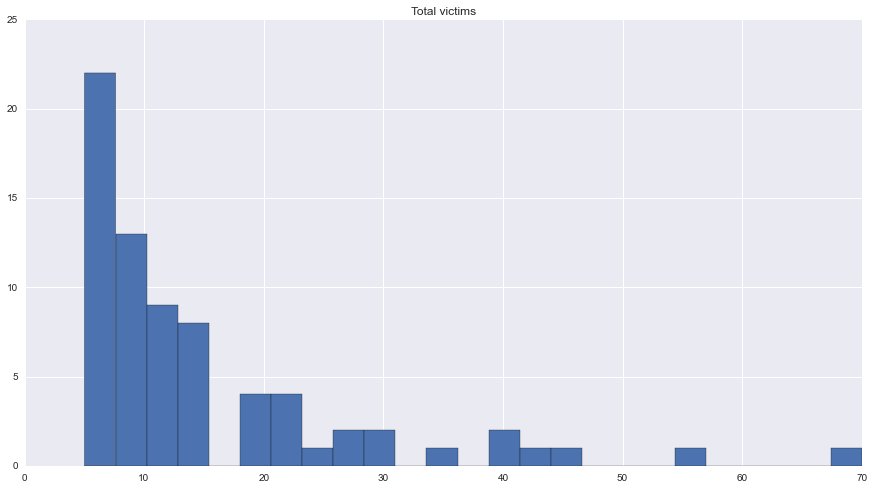

In [117]:
df.hist(column='Total victims', bins=25, figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1235ab950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123d3ff50>]], dtype=object)

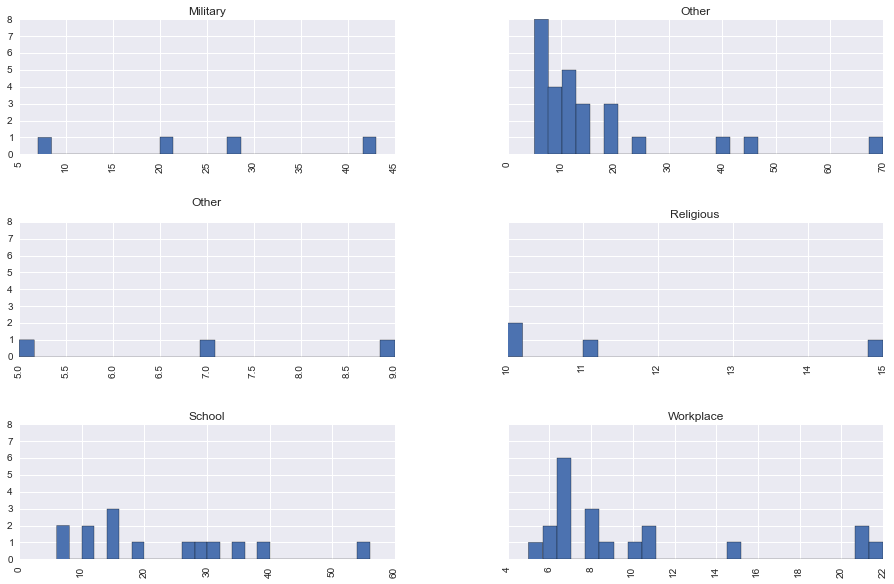

In [115]:
df.hist(column='Total victims', bins=25, by='Venue', sharey=True, figsize=(15,10))

<h3>Casualties by Time</h3>
<p>First thing I want to check out is casaulties over time.</p>

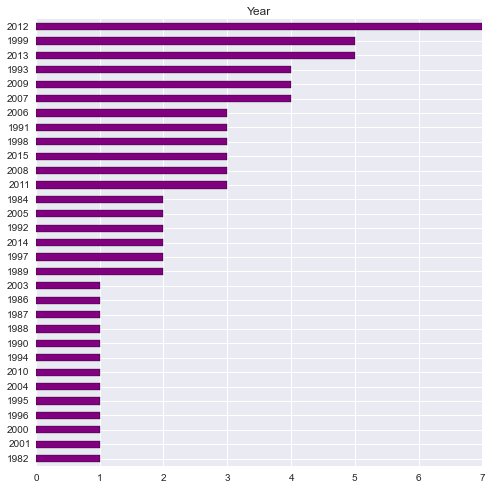

In [123]:
plot_counts( df, 'Year')

conversion of datetime

In [130]:
df['dt'] = df['Date'].apply(lambda x: pd.to_datetime(x) )

In [131]:
dfdt = df[['dt', 'Fatalities', 'Injured', 'Total victims']]
dfdt.set_index('dt', inplace=True)

In [132]:
dfdt.head(10)

,Fatalities,Injured,Total victims
dt,,,
2015-10-01,9,9,18
2015-07-16,5,2,7
2015-06-17,9,1,10
2014-10-24,5,1,6
2014-02-20,4,2,6
2013-09-16,13,8,21
2013-07-26,7,0,7
2013-06-07,6,3,9
2013-04-21,5,0,5


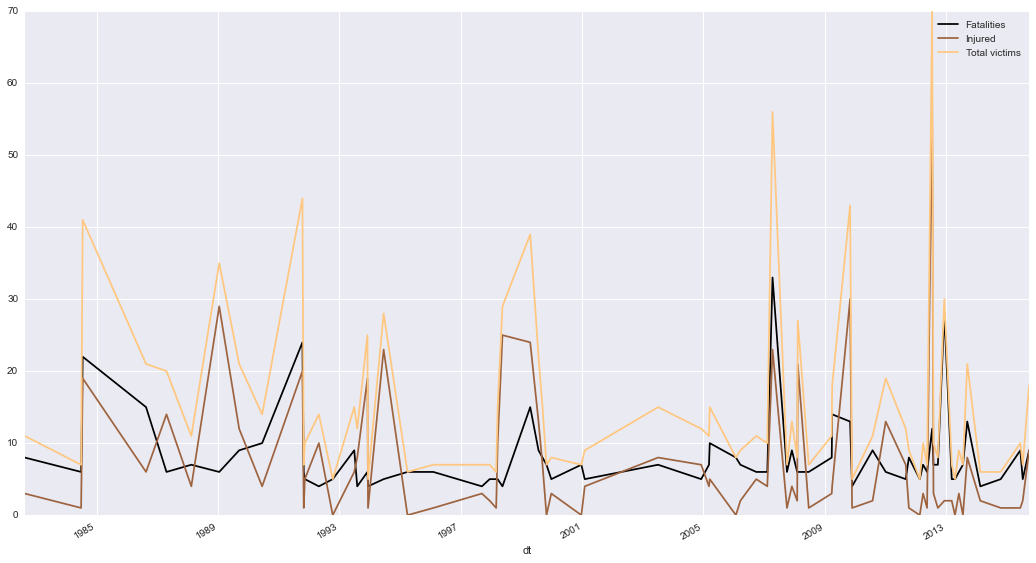

In [133]:
dfdt.plot(figsize=(18,10), colormap='copper')

<h3>Heatmap for Temporal Data</h3>

Year X Month

In [134]:
dfheat = df[['dt', 'Total victims']]

In [139]:
dfheat['year'] = df['dt'].apply(lambda x: x.year)
dfheat['month'] = df['dt'].apply(lambda x: x.month)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [141]:
dfheat.head()

,dt,Total victims,year,month
0,2015-10-01,18,2015,10
1,2015-07-16,7,2015,7
2,2015-06-17,10,2015,6
3,2014-10-24,6,2014,10
4,2014-02-20,6,2014,2


In [151]:
dfagg = dfheat.groupby(['year', 'month']).sum()
dfagg = dfagg.reset_index()
matrix = dfagg.pivot('year', 'month', 'Total victims')
# matrix.fillna(0, inplace=True)

In [152]:
matrix

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,7,41,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,17,NaN
1992,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,5,NaN,NaN


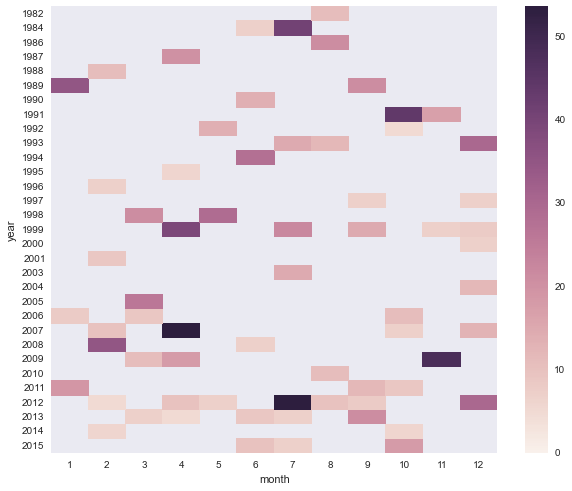

In [153]:
viz = sns.heatmap(matrix, annot=False, vmin=0, robust=True)

<h1>Analyzing Geo-location</h1>

In [164]:
import folium
from IPython.display import HTML

In [165]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

In [166]:
gln = Nominatim()
glg = GoogleV3()
def get_geo_data( s ):
    if s:
        loc = glg.geocode( s )
        if loc:
            return loc.address, loc.latitude, loc.longitude
        else:
            loc = gln.geocode( s )
            if loc:
                return loc.address, loc.latitude, loc.longitude
            else:
                return '', None, None
            
    else:
        return '', None, None

In [167]:
def folium_display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

check any null values in latitude (longitude turned out to be the same results) - there was only one location that was missing geo coordinates)

In [159]:
df[pd.isnull(df['latitude'])]

,Case,Location,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of possible mental illness,...,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type,dt
0,Umpqua Community College shooting,"Roseburg, OR",10/1/2015,2015,26-year-old Chris Harper Mercer opened fire a...,9,9,18,School,Unclear,...,"Five pistols, one rifle, five magazines of amm...","9 mm Glock pistol, .40 caliber Smith & Wesson,...",Mixed,Male,http://www.nytimes.com/2015/10/03/us/chris-har...,http://www.latimes.com/nation/nationnow/la-na-...,NaN,NaN,Mass,2015-10-01


In [162]:
get_geo_data('Roseburg, OR')

(u'Roseburg, OR, USA', 43.216505, -123.3417381)

In [169]:
# manual update of the geo coordinates for the first item
df.ix[0, 'latitude'] = 43.216505
df.ix[0, 'longitude'] = -123.3417381

In [183]:
df.columns

Index([u'Case', u'Location', u'Date', u'Year', u'Summary', u'Fatalities',
       u'Injured', u'Total victims', u'Venue',
       u'Prior signs of possible mental illness', u'Mental Health',
       u'Weapons obtained legally', u'Where obtained', u'Type of weapons',
       u'Weapon details', u'Race', u'Gender', u'Sources',
       u'Mental Health Sources', u'latitude', u'longitude', u'Type', u'dt'],
      dtype='object')

In [199]:
START_COORDINATES = (40, -100) 

m = folium.Map(location=START_COORDINATES, zoom_start=4)

#add a marker for every record in the filtered data, use a clustered view
for r in df.iterrows():  
    m.simple_marker(
        location = [r[1]['latitude'],r[1]['longitude']],
        popup="{} | Total victims: {}".format(r[1]['Case'], r[1]['Total victims']),
        clustered_marker = True
    )
folium_display(m, 500)

<h1>Using shootingtracker.com Dataset</h1>

In [211]:
df2 = pd.read_csv( r'data/2015CURRENT.csv' )
df2 = df2[['Date', 'Shooter', 'Dead', 'Injured', 'Location']]

In [214]:
df2.head()

,Date,Shooter,Dead,Injured,Location
0,1/1/2015,Unknown,0,5,"Memphis, TN"
1,1/2/2015,Unknown,1,4,"Savannah, GA"
2,1/4/2015,Unknown,3,1,"Dallas, TX"
3,1/4/2015,William Christopher Cabbler,2,4,"Roanoke, VA"
4,1/6/2015,Unknown,1,3,"Miami, FL"


In [216]:
import time

locations = df2['Location']
geodata = []
for loc in locations:
    data = get_geo_data( loc )
    geodata.append(data)
    time.sleep(.5)

In [217]:
df2['raw_geo_data'] = geodata

In [220]:
df2['stdloc'] = [x[0] for x in df2['raw_geo_data']]
df2['latitude'] = [x[1] for x in df2['raw_geo_data'] ]
df2['longitude'] = [x[2] for x in df2['raw_geo_data'] ]

In [237]:
START_COORDINATES = (40, -100) 

m = folium.Map(location=START_COORDINATES, zoom_start=4)

for r in df2.iterrows():  
    m.circle_marker(
        location = [r[1]['latitude'],r[1]['longitude']],
        popup="{} | Dead: {} | Injured: {}".format(r[1]['Date'],
                                                   r[1]['Dead'],
                                                   r[1]['Injured']),
        radius=500,
        line_color='#b30000',
        fill_color='#b30000',
        fill_opacity=0.2
    )
folium_display(m, 500)

In [235]:
START_COORDINATES = (40, -100) 

m = folium.Map(location=START_COORDINATES, zoom_start=4)

for r in df2.iterrows():  
    m.simple_marker(
        location = [r[1]['latitude'],r[1]['longitude']],
        popup="{} | Dead: {} | Injured: {}".format(r[1]['Date'],
                                                   r[1]['Dead'],
                                                   r[1]['Injured']),
        clustered_marker = True
    )
folium_display(m, 500)

<h1>Interactive Widgets</h1>

In [248]:
df2['dt'] = df2['Date'].apply(lambda x: pd.to_datetime(x) )

In [252]:
df2['year'] = df2['dt'].apply(lambda x: x.year)
df2['month'] = df2['dt'].apply(lambda x: x.month)
df2['day'] = df2['dt'].apply(lambda x: x.day)

In [254]:
from IPython.html.widgets import interact

In [281]:
def get_data_by_month(month):
    subdf = df2[df2['month'] == month]
    total_deaths = subdf['Dead'].sum()
    total_injuries = subdf['Injured'].sum()
    return 'Dead: {} | Injuries: {}'.format( total_deaths, total_injuries )

In [282]:
interact(get_data_by_month, month=(1,12, 1))

'Dead: 51 | Injuries: 173'

<h3>Using the first dataset</h3>

In [289]:
df3 = df[['dt',
          'Fatalities',
          'Injured',
          'Total victims',
          'Venue',
          'Prior signs of possible mental illness',
          'Weapons obtained legally',
          'Race',
          'Gender',
          'Type']]

In [309]:
df3['year'] = df3['dt'].apply(lambda x: x.year)
df3['month'] = df3['dt'].apply(lambda x: x.month)
df3['day'] = df3['dt'].apply(lambda x: x.day)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [303]:
tmp = df3['year'].unique()

In [307]:
def plot_datas_by_year( year ):
    subdf = df3[df3['year'] == year]
    
    if len(subdf) > 0:

        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
        plt.tight_layout(pad=1, w_pad=1, h_pad=5)

        get_ser(subdf, 'Venue').plot(kind='barh', color='purple', title='Venue', ax=axes[0,0])
        get_ser(subdf, 'Prior signs of possible mental illness').plot(kind='barh', color='k', title='Prior Mental Illness', ax=axes[1,0])
        get_ser(subdf, 'Weapons obtained legally', maxchars=10).plot(kind='barh', color='darkred', title='Weapons Obtained Legally', ax=axes[2,0])
        get_ser(subdf, 'Race').plot(kind='barh', color='darkblue', title='Race', ax=axes[0,1])
        get_ser(subdf, 'Gender').plot(kind='barh', color='darkgreen', title='Gender', ax=axes[1,1])
        get_ser(subdf, 'Type').plot(kind='barh', color='darkgoldenrod', title='Type', ax=axes[2,1])


None

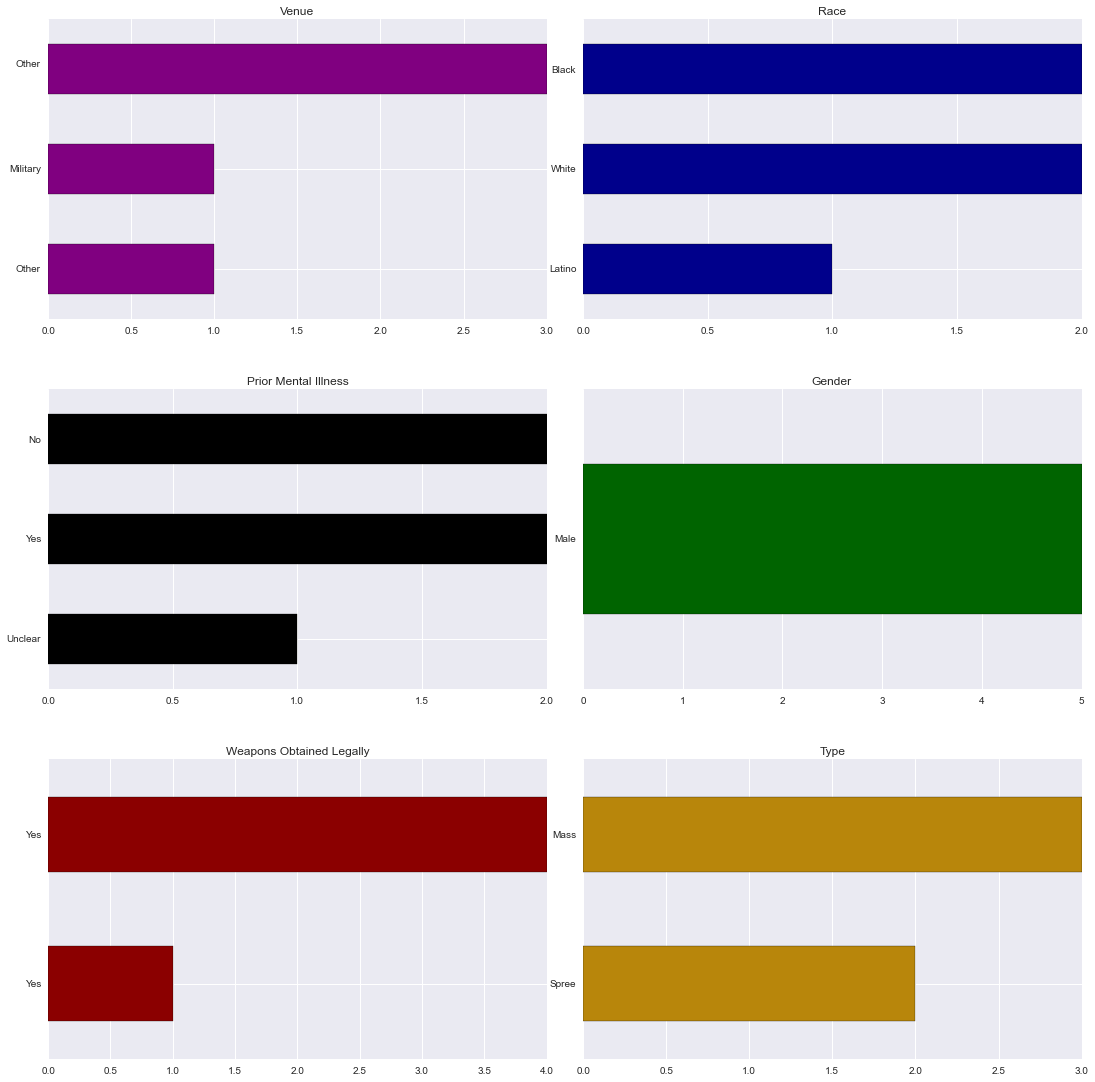

In [308]:
interact(plot_datas_by_year, year=(1982,2015, 1))